# **Part A**

##**1. Import and analyse the data set**

In [ ]:
# Import libraries

import numpy as np
import pandas as pd

# Unzip the zip files
from zipfile import ZipFile

# For regular expressions
import re


# Test train split
from sklearn.model_selection import train_test_split

# Vectorize the data
from sklearn.feature_extraction.text import CountVectorizer

# Multilabel Binarizer
from sklearn.preprocessing import MultiLabelBinarizer

# Linear Classifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

# Performance matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

# Import tensorflow
import tensorflow as tf
#Importing Libraries
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.optimizers import SGD 
import tensorflow as tf
import matplotlib.pyplot as plt

# Sequential model
from keras.utils import to_categorical
from keras import models
from keras import layers

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Loading most frequent 10000 words

from keras.datasets import imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
# Print training dimensions
X_train.shape

(25000,)

In [ ]:
# Print testing dimensions
X_test.shape

(25000,)

## **2. Perform relevant sequence adding on the data**

In [ ]:
# Function to perform sequence adding on the data

def vectorize(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [ ]:
# Consolidating data for EDA
data = np.concatenate((X_train, X_test), axis=0)
label = np.concatenate((y_train, y_test), axis=0)

## **3. Perform Data Analysis**

**Print shape of features and labels**

In [ ]:
print("Categories:", np.unique(label))
print("Number of unique words:", len(np.unique(np.hstack(data))))

Categories: [0 1]
Number of unique words: 9998


In [ ]:
length = [len(i) for i in data]
print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))

Average Review length: 234.75892
Standard Deviation: 173


**Print value of any one feature and it's label**

In [ ]:
# Printing a single training sample
print("Label:", label[0])

Label: 1


In [ ]:
print(data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


## **4. Decode the feature value to get original sentence**

In [ ]:
# Decoding first review

index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in data[0]] )
print(decoded) 

1641221/1641221 [==============================] - 0s 0us/step
# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amaz

In [ ]:
#Adding sequence to data
data_seq = vectorize(data)
label_seq = np.array(label).astype("float32")

In [ ]:
data_seq

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [ ]:
label_seq

array([1., 0., 0., ..., 0., 0., 0.], dtype=float32)

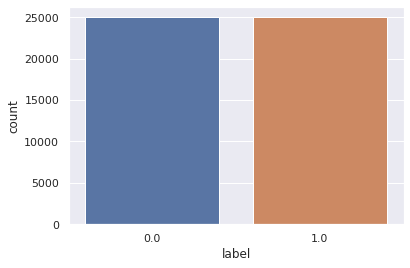

In [ ]:
# Visulaize distribution of data for EDA

sns.set(color_codes=True)

labelDF=pd.DataFrame({'label':label_seq})
sns.countplot(x='label', data=labelDF)

## **5. Design, train, tune and test a sequential model**

In [ ]:
# Creating training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_seq,label_seq, test_size=0.30, random_state=1)

In [ ]:
X_train.shape

(35000, 10000)

In [ ]:
X_test.shape

(15000, 10000)

**Designing sequential model**

In [ ]:
# Creating sequential model

model = models.Sequential()
# Input - Layer
model.add(layers.Dense(50, activation = "relu", input_shape=(10000, )))
# Hidden - Layers
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
# Output- Layer
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                500050    
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 505,201
Trainable params: 505,201
Non-trai

**Training , tuning and testing sequential model**

In [ ]:
#For early stopping 
import tensorflow as tf
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [ ]:
model.compile(optimizer = "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [ ]:
model_result = model.fit(X_train, y_train,epochs= 100,batch_size = 100,validation_data = (X_test, y_test),callbacks=[callback])

Epoch 1/100
350/350 [==============================] - 3s 5ms/step - loss: 0.3380 - accuracy: 0.8554 - val_loss: 0.2625 - val_accuracy: 0.8921
Epoch 2/100
350/350 [==============================] - 1s 4ms/step - loss: 0.1962 - accuracy: 0.9249 - val_loss: 0.2833 - val_accuracy: 0.8906
Epoch 3/100
350/350 [==============================] - 1s 3ms/step - loss: 0.1346 - accuracy: 0.9507 - val_loss: 0.3251 - val_accuracy: 0.8855
Epoch 4/100
350/350 [==============================] - 1s 3ms/step - loss: 0.0931 - accuracy: 0.9672 - val_loss: 0.3954 - val_accuracy: 0.8844
Epoch 5/100
350/350 [==============================] - 1s 3ms/step - loss: 0.0687 - accuracy: 0.9759 - val_loss: 0.4513 - val_accuracy: 0.8807
Epoch 6/100
350/350 [==============================] - 1s 3ms/step - loss: 0.0561 - accuracy: 0.9796 - val_loss: 0.4975 - val_accuracy: 0.8811
Epoch 7/100
350/350 [==============================] - 1s 3ms/step - loss: 0.0461 - accuracy: 0.9833 - val_loss: 0.5245 - val_accuracy: 0.8807

In [ ]:
# Mean accuracy of our model
print(np.mean(model_result.history["val_accuracy"]))

0.882142858845847


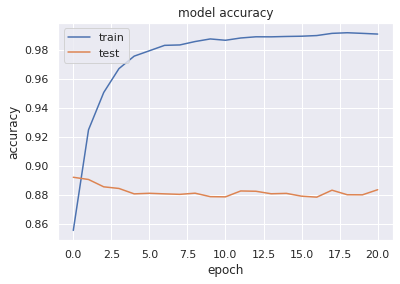

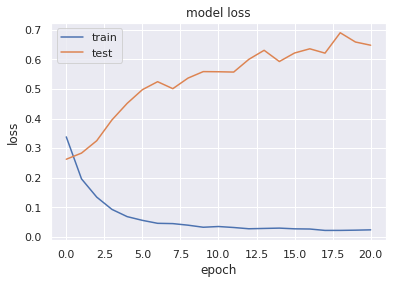

In [ ]:
# Plotting training vs. validation loss and accuracy

# Accuracy
plt.plot(model_result.history['accuracy'])
plt.plot(model_result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Loss
plt.plot(model_result.history['loss'])
plt.plot(model_result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
pred_res = model.predict(X_test)

469/469 [==============================] - 1s 1ms/step


In [ ]:
pred_res

array([[7.2476037e-02],
       [1.0000000e+00],
       [9.2209113e-01],
       ...,
       [3.0327147e-09],
       [4.4324515e-06],
       [1.0000000e+00]], dtype=float32)

## **6. Use the designed model to print the prediction on any one sample**

In [ ]:
# Select a random number
# importing the random module
import random

num = random.randint(0,9998)
print(num)
print(data[num])

index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
decoded_test = " ".join( [reverse_index.get(i - 3, "#") for i in data[num]] )
print(decoded_test)

7243
[1, 146, 24, 252, 48, 14, 9, 49, 243, 7, 991, 42, 43, 2928, 5628, 2, 34, 4, 354, 5, 2057, 845, 4, 420, 146, 252, 13, 447, 12, 39, 4, 1669, 2509, 8464, 2, 537, 8, 4, 6922, 2950, 354, 39, 670, 5767, 5, 3337, 5579, 8, 4, 3983, 2, 3335, 19, 63, 45, 32, 2004, 14, 9, 312, 707, 1157, 5, 45, 87, 253, 24, 8, 760, 4, 2, 7518, 5, 2, 2, 861, 2, 63, 2, 4, 436, 22, 210, 3556, 8, 1090, 39, 4, 1459, 83, 4, 414, 21, 115, 399, 38, 474, 30, 3173, 48, 13, 301, 15, 4, 598, 2099, 722, 1107, 161, 6558, 8, 61, 119, 18, 12, 21, 225, 49, 432, 7, 1162, 7102, 496, 4, 4072, 42, 16, 12, 212, 5, 13, 66, 66, 2, 15, 13, 100, 66, 79, 83, 14, 2616, 538]
# i'm not sure if this is some kind of masterpiece or just sleazy fluff # by the performances and visuals whatever the case i'm sure i loved it from the wonderfully twisted lurid # stories to the deliciously sinister performances from robert stack and dorothy malone to the vivid # colour with which it's all captured this is high class trash and it's great fun not to

In [ ]:
# Removing "#"
decoded_test = decoded_test.replace('# ', '')

In [ ]:
decoded_test

"i'm not sure if this is some kind of masterpiece or just sleazy fluff by the performances and visuals whatever the case i'm sure i loved it from the wonderfully twisted lurid stories to the deliciously sinister performances from robert stack and dorothy malone to the vivid colour with which it's all captured this is high class trash and it's great fun not to mention the sly and sexual which the entire film always threatening to escape from the image into the dialogue but never doing so i'd be lying if i said that the film's sheer entertainment value didn't contribute to my love for it but there's some sort of bizarre artistry behind the unintentional or was it comedy and i really really that i could really get into this melodrama stuff"

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
#vectorizing the tweet by the pre-fitted tokenizer instance
vocabSize = 2000
tokenizer = Tokenizer(num_words=vocabSize, split=' ')
tokenizer.fit_on_texts(decoded_test)
head = tokenizer.texts_to_sequences(decoded_test)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(head, maxlen=10000, dtype='int32', value=0)
print(twt)
#sent = vectorize(decoded)
sentiment = model.predict(twt,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")

[[ 0  0  0 ...  0  0  3]
 [ 0  0  0 ...  0  0 17]
 [ 0  0  0 ...  0  0 12]
 ...
 [ 0  0  0 ...  0  0 13]
 [ 0  0  0 ...  0  0 14]
 [ 0  0  0 ...  0  0 14]]
745/745 - 1s - 729ms/epoch - 978us/step
negative


# **Part B**

In [ ]:
# Importing libraries

import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import re

print("Tensorflow Version",tf.__version__)

# Unzip the zip files
from zipfile import ZipFile

# Importing json file
import json

# Random number generation
import random

# Model Building
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

# Tokenization
from keras.preprocessing.text import Tokenizer

# Padding sequences
from keras_preprocessing.sequence import pad_sequences

#Optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

Tensorflow Version 2.9.2


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Read and explore the data**

In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/Sarcasm_Headlines_Dataset.json.zip'

In [ ]:
with ZipFile(file_path,'r') as zip:
  listOfFileNames = zip.namelist()
  zip.extractall(path='/content/drive/My Drive/Colab Notebooks/')

In [ ]:
listOfFileNames

['Sarcasm_Headlines_Dataset.json']

In [ ]:
json_file_path = '/content/drive/My Drive/Colab Notebooks/Sarcasm_Headlines_Dataset.json'

In [ ]:
headlines = []
for line in open(json_file_path, 'r'):
    headlines.append(json.loads(line))

In [ ]:
headlines

[{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
  'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
  'is_sarcastic': 0},
 {'article_link': 'https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365',
  'headline': "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
  'is_sarcastic': 0},
 {'article_link': 'https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697',
  'headline': "mom starting to fear son's web series closest thing she will have to grandchild",
  'is_sarcastic': 1},
 {'article_link': 'https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302',
  'headline': 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
  'is_sarcastic': 1},
 {'article_link': 'https://www.huffingtonpost.com/entry/jk-rowling-w

In [ ]:
headline_df = pd.json_normalize(headlines)

### **Retain relevant columns**

In [ ]:
headline_df.head(10)

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
5,https://www.huffingtonpost.com/entry/advancing...,advancing the world's women,0
6,https://www.huffingtonpost.com/entry/how-meat-...,the fascinating case for eating lab-grown meat,0
7,https://www.huffingtonpost.com/entry/boxed-col...,"this ceo will send your kids to school, if you...",0
8,https://politics.theonion.com/top-snake-handle...,top snake handler leaves sinking huckabee camp...,1
9,https://www.huffingtonpost.com/entry/fridays-m...,friday's morning email: inside trump's presser...,0


In [ ]:
# Dropping column 'article_link'

headline_df = headline_df.drop(['article_link'], axis=1)

In [ ]:
lab_to_sentiment = {0:"Negative", 1:"Positive"}
def label_decoder(label):
  return lab_to_sentiment[label]
headline_df.is_sarcastic = headline_df.is_sarcastic.apply(lambda x: label_decoder(x))
headline_df.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,Negative
1,the 'roseanne' revival catches up to our thorn...,Negative
2,mom starting to fear son's web series closest ...,Positive
3,"boehner just wants wife to listen, not come up...",Positive
4,j.k. rowling wishes snape happy birthday in th...,Negative


Text(0.5, 1.0, 'Sarcastic Data Distribution')

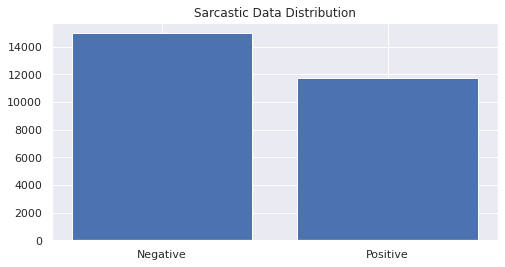

In [ ]:
val_count = headline_df.is_sarcastic.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sarcastic Data Distribution")

In [ ]:
# Length of each sentence
length = []
for i in range(len(headline_df.headline)):
  length.append(len(headline_df.headline[i]))

In [ ]:
headline_df['Sentence Length'] =length

In [ ]:
headline_df.head(10)

,headline,is_sarcastic,Sentence Length
0,former versace store clerk sues over secret 'b...,Negative,78
1,the 'roseanne' revival catches up to our thorn...,Negative,84
2,mom starting to fear son's web series closest ...,Positive,79
3,"boehner just wants wife to listen, not come up...",Positive,84
4,j.k. rowling wishes snape happy birthday in th...,Negative,64
5,advancing the world's women,Negative,27
6,the fascinating case for eating lab-grown meat,Negative,46
7,"this ceo will send your kids to school, if you...",Negative,67
8,top snake handler leaves sinking huckabee camp...,Positive,50
9,friday's morning email: inside trump's presser...,Negative,59


In [ ]:
# Dropping column 'Sentence Length'

headline_df = headline_df.drop(['Sentence Length'], axis=1)

### **Get indices for words**

In [ ]:
# creates random indexes to choose from dataframe
random_idx_list = [random.randint(1,len(headline_df.headline)) for i in range(10)] 

# Returns the rows with the index and display it
headline_df.loc[random_idx_list,:].head(10) 

,headline,is_sarcastic
9206,who is hacking all of these 'glee' stars?,Negative
21262,multi-institutional collaborative clinical tri...,Negative
18650,scandal's joe morton the subject of unsung hol...,Negative
8935,sun goes out for a few seconds,Positive
8491,crossing the finish line for kids with cardiom...,Negative
12700,husky can't stop blowing bubbles; we can't sto...,Negative
26201,'queer eye' emotionally reflects on the unique...,Negative
2555,increasingly desperate advertisers settle for ...,Positive
11033,canon 5d mark iv dslr preview video,Negative
16950,smoke detector saves family from buying new ba...,Positive


### **Create features and labels and Define Parameters**

In [ ]:
# Text processing
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [ ]:
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [ ]:
headline_df.headline = headline_df.headline.apply(lambda x: preprocess(x))

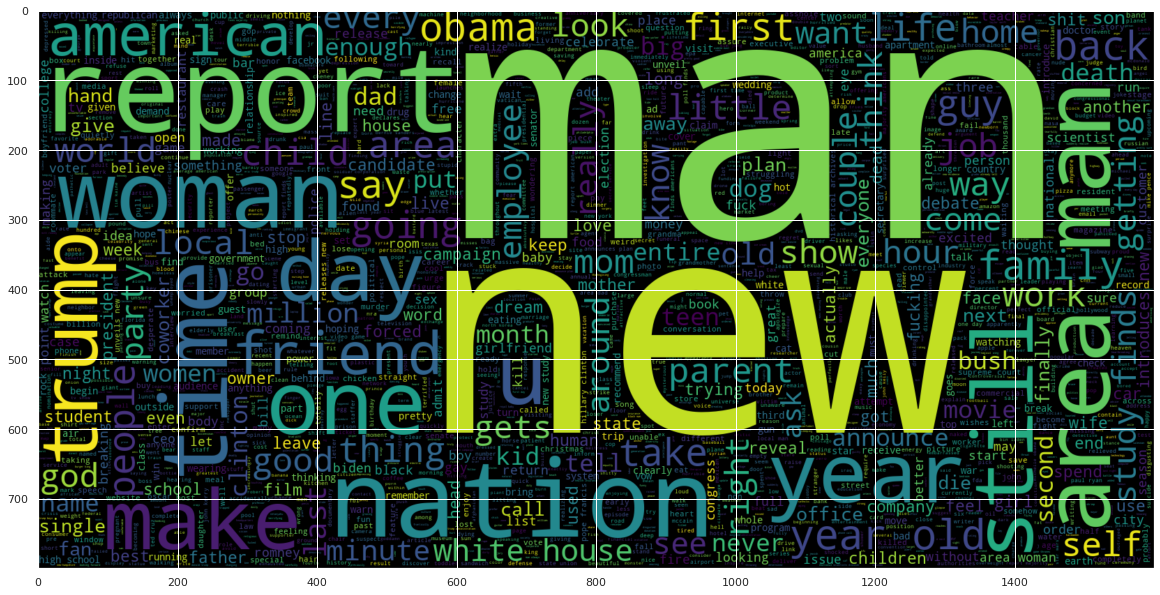

In [ ]:
# Positive words
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(headline_df[headline_df.is_sarcastic == 'Positive'].headline))
plt.imshow(wc , interpolation = 'bilinear')


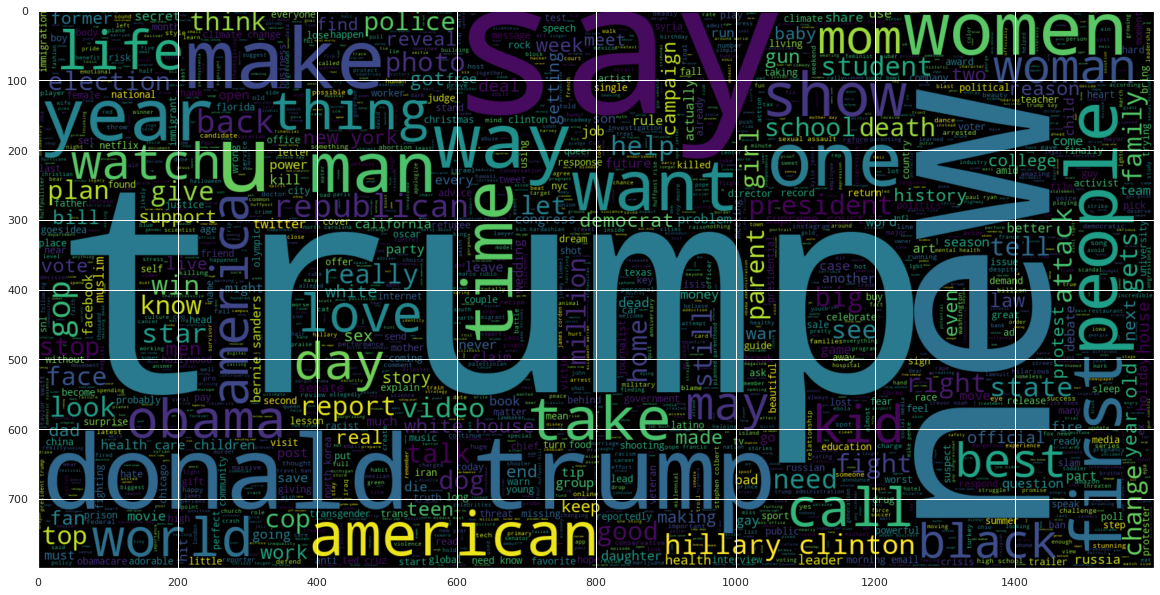

In [ ]:
# Negative words

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(headline_df[headline_df.is_sarcastic == 'Negative'].headline))
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
# Train test split
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

In [ ]:
train_data, test_data = train_test_split(headline_df, test_size=1-TRAIN_SIZE,
                                         random_state=7) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 21367
Test Data size 5342


In [ ]:
train_data.head(10)

,headline,is_sarcastic
17474,piece heart quick questions leslie kritzer tea...,Negative
11855,moving forward 2017 four resolutions grieving,Negative
948,judge asked keep knees together resigns,Negative
22059,notre dame stung hunting ground u investigatio...,Negative
15877,donald trump makes dubious claim inauguration ...,Negative
12391,infants piling orphanage old address,Positive
18681,progressive groups want doug jones throw cauti...,Negative
19659,new report shows many u businesses actually fr...,Positive
10718,penn state fined record 2 4 million sandusky case,Negative
13345,washington c drive innovation education throug...,Negative


### **Get vocabulary size**

In [ ]:
# Tokenization

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.headline)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 22761


In [ ]:
# Padding Sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.headline),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.headline),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (21367, 30)
Testing X Shape: (5342, 30)


In [ ]:
labels = train_data.is_sarcastic.unique().tolist()

In [ ]:
# Label encoding
encoder = LabelEncoder()
encoder.fit(train_data.is_sarcastic.to_list())

y_train = encoder.transform(train_data.is_sarcastic.to_list())
y_test = encoder.transform(test_data.is_sarcastic.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (21367, 1)
y_test shape: (5342, 1)


### **Create a weight matrix using GloVe embeddings**

In [ ]:
# Word embedding

In [ ]:
# Unzip glove

glove_file_path = '/content/drive/My Drive/Colab Notebooks/glove.6B.zip'

with ZipFile(glove_file_path,'r') as zip:
  glove_listOfFileNames = zip.namelist()
  zip.extractall(path='/content/drive/My Drive/Colab Notebooks/')

In [ ]:
glove_listOfFileNames

['glove.6B.50d.txt',
 'glove.6B.100d.txt',
 'glove.6B.200d.txt',
 'glove.6B.300d.txt']

In [ ]:
GLOVE_EMB = '/content/drive/My Drive/Colab Notebooks/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10

In [ ]:
embeddings_index = {}

f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [ ]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [ ]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

### **Define and compile a Bidirectional LSTM model**

In [ ]:
# Model Training LSTM

In [ ]:
# 1) Embedding layer
# 2) Conv1D Layer
# 3) LSTM
# 4) Dense
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [ ]:
# Optimization algorithm
# LR Schedular
# Model Check point

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor ='val_loss',
                                     verbose = 1)


### **Fit the model and check the validation accuracy**

In [ ]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/10
21/21 [==============================] - 12s 306ms/step - loss: 0.6247 - accuracy: 0.6350 - val_loss: 0.5437 - val_accuracy: 0.7267 - lr: 0.0010
Epoch 2/10
21/21 [==============================] - 6s 281ms/step - loss: 0.5183 - accuracy: 0.7457 - val_loss: 0.4918 - val_accuracy: 0.7595 - lr: 0.0010
Epoch 3/10
21/21 [==============================] - 6s 281ms/step - loss: 0.4772 - accuracy: 0.7747 - val_loss: 0.4682 - val_accuracy: 0.7722 - lr: 0.0010
Epoch 4/10
21/21 [==============================] - 6s 281ms/step - loss: 0.4368 - accuracy: 0.7930 - val_loss: 0.4378 - val_accuracy: 0.7920 - lr: 0.0010
Epoch 5/10
21/21 [==============================] - 6s 284ms/step - loss: 0.4047 - accuracy: 0.8135 - val_loss: 0.4355 - val_accuracy: 0.7961 - lr: 0.0010
Epoch 6/10
21/21 [==============================] - 6s 287ms/step - loss: 0.3683 - accuracy: 0.8353 - val_loss: 0.4245 - val_accuracy: 0.8031 - lr: 0.0010
Epoch 7/10
21/21 [==============================] - 6s 286ms/step - l

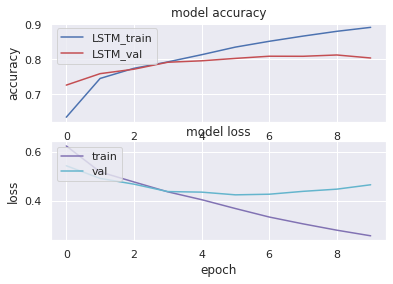

In [ ]:
# Model Evaluation

s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

In [ ]:
def decode_sentiment(score):
    return "Positive" if score>0.5 else "Negative"


scores = model.predict(x_test, verbose=1, batch_size=10000)
y_pred_1d = [decode_sentiment(score) for score in scores]

1/1 [==============================] - 1s 615ms/step


In [ ]:
print("Predicted score:",y_pred_1d)

Predicted score: ['Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Positive', 'Positive', 'Negative'

In [ ]:
# Confusion matrix
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

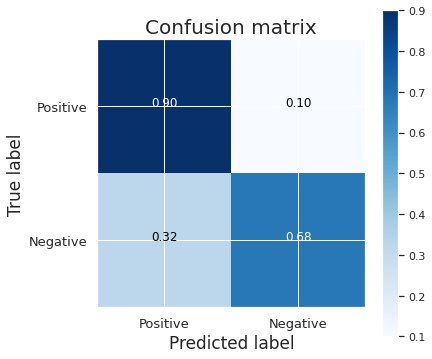

In [ ]:
cnf_matrix = confusion_matrix(test_data.is_sarcastic.to_list(), y_pred_1d)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=test_data.is_sarcastic.unique(), title="Confusion matrix")
plt.show()

In [ ]:
# Classification scores
print(classification_report(list(test_data.is_sarcastic), y_pred_1d))

              precision    recall  f1-score   support

    Negative       0.79      0.90      0.84      3041
    Positive       0.84      0.68      0.75      2301

    accuracy                           0.80      5342
   macro avg       0.81      0.79      0.79      5342
weighted avg       0.81      0.80      0.80      5342

